In [3]:
import math
import numpy as np
from matplotlib import pyplot as plt
import sys
import random
import scipy.optimize as opt

random.seed(19680801)
np.random.seed(19680801)

plt.rcParams["figure.autolayout"] = True

In [4]:
class Point:
  def __init__(self, x, y):
    self.x = x
    self.y = y

In [5]:
f_1 = lambda x: x**3
a_1 = 0
b_1 = 1

f_2 = lambda x: abs(x - 0.2)
a_2 = 0
b_2 = 1

f_3 = lambda x: x * np.sin(1 / x)
a_3 = 0.01
b_3 = 1

f_list = [f_1, f_2, f_3]

In [6]:
def exhaustive_search(func, a, b, e = 0.001):
    optim_point = Point(math.inf, math.inf)
    
    n = int((b - a) / e)
    step = (b - a) / n
    
    for k in range(0, n):
        x_k = a + k * step
        y_k = func(x_k)
        
        if optim_point.y > y_k:
            optim_point = Point(x_k, y_k)
    
    iter_count = n
    f_calc_count = n

    return optim_point, iter_count, f_calc_count

In [7]:
def dichotomy(func, a, b, e = 0.001):
    sigma = random.uniform(0, e)
    
    iter_count = 0
    f_calc_count = 0
    
    while abs(a - b) > e:
        iter_count += 1
        f_calc_count += 2
        
        x1 = (a + b - sigma) / 2
        x2 = (a + b + sigma) / 2
        
        f_x1 = func(x1)
        f_x2 = func(x2)
        
        if(f_x1 <= f_x2):
            b = x2
        else:
            a = x1
            
    min_x = (a + b) / 2
    min_y = (f_x1 + f_x2)  / 2
    optim_point = Point(min_x, min_y)
    
    return optim_point, iter_count, f_calc_count

In [8]:
def golden_section(func, a, b, e = 0.001):
    iter_count = 0
    f_calc_count = 2
    
    delta = (3 - math.sqrt(5))  * (b - a) / 2
            
    x1 = a + delta
    x2 = b - delta
    
    f_x1 = func(x1)
    f_x2 = func(x2)
    
    flag = 0
    
    while abs(a - b) >= e:
        #print(f' a: {a}\n b: {b}\n x1: {x1}\n x2: {x2}\n f1: {f_x1}\n f2: {f_x2}\n')
        iter_count += 1
        f_calc_count += 1
        
        if(f_x1 <= f_x2):
            b = x2
            x2 = x1
            
            delta = ((3 - math.sqrt(5)) / 2) * (b - a)
            x1 = a + delta   
            
            f_x2 = f_x1
            f_x1 = func(x1)
        else:
            a = x1
            x1 = x2
            
            delta = ((3 - math.sqrt(5)) / 2) * (b - a)
            x2 = b - delta
            
            f_x1 = f_x2
            f_x2 = func(x2)
            
    min_x = (a + b) / 2
    min_y = (f_x1 + f_x2)  / 2
    optim_point = Point(min_x, min_y)
    
    return optim_point, iter_count, f_calc_count

methods_list = [exhaustive_search, dichotomy, golden_section]

In [9]:
point, n, m = golden_section(f_2, 0, 1)
print(point.x, point.y)

0.2000733137435857 8.653513585611672e-05


In [10]:
marks = ['s', '^', 'o']
def plot_func_and_optimal_point(func, methods_and_points, a, b, func_name):
    fig, ax = plt.subplots(len(methods_and_points), figsize=(6, 10))
    
    fig.suptitle(func_name)
    
    x = np.linspace(a, b, num=100)

    for idx, (method, marker) in enumerate(zip(methods_and_points,marks)):
        ax[idx].plot(x, func(x))
        optim_point = methods_and_points[method]
        
        ax[idx].plot(optim_point.x, optim_point.y,
            marker=marker, label=method)
        
        ax[idx].text(optim_point.x, optim_point.y + 0.05,
             '({0:0.2f}, {1:0.2f})'.format(optim_point.x, optim_point.y,))
    
        ax[idx].set(xlabel='x', ylabel='y')
    
        ax[idx].legend()
        ax[idx].grid()

    plt.show()

In [11]:
def make_table(table_data,
               row_headers = ['exhaustive_search','dichotomy','golden_sections'],
               column_headers = ['iter_count','f_calc_count']):
    
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=table_data,
          rowLabels=row_headers,
          colLabels=column_headers,
             loc='center',
            cellLoc='center')

    plt.show()

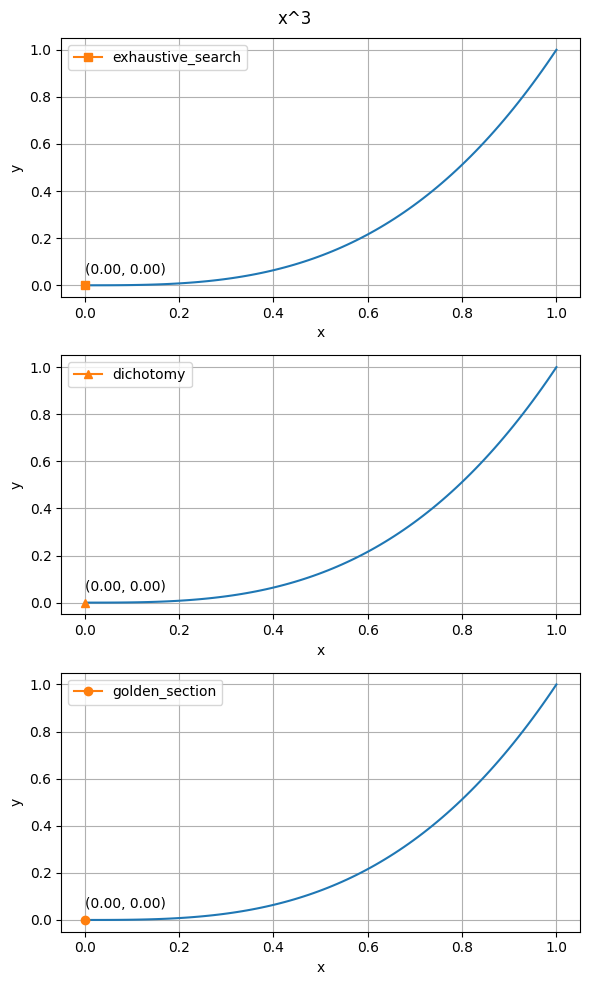

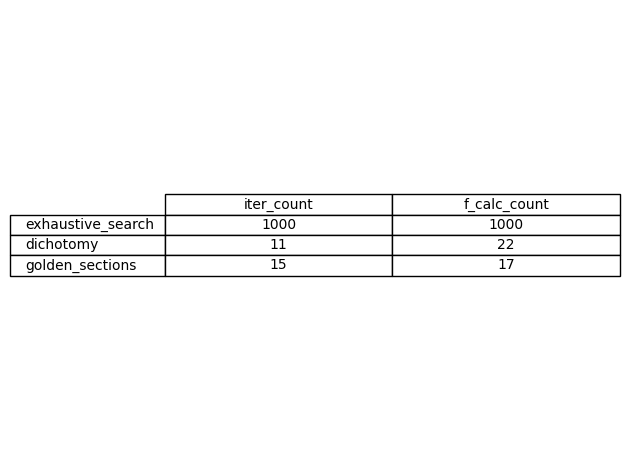

In [10]:
methods_and_points = {}
table_data = []

for m in methods_list:
    optim, iter_count, f_calc_count = m(f_1, a = a_1, b = b_1)
    methods_and_points[m.__name__] = optim
    table_data.append([iter_count, f_calc_count])

plot_func_and_optimal_point(f_1, methods_and_points, a = a_1, b = b_1, func_name = 'x^3')
make_table(table_data)

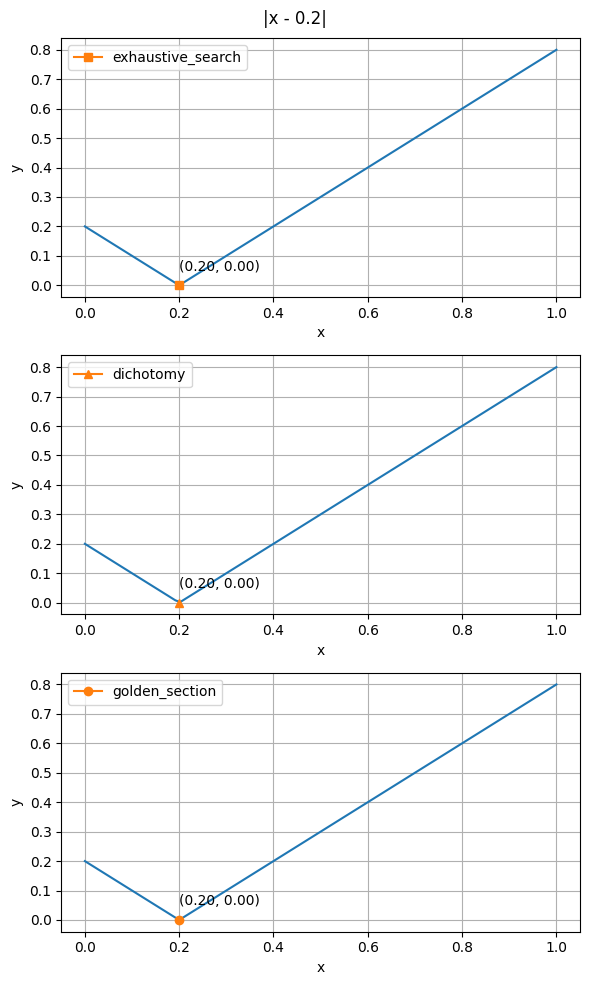

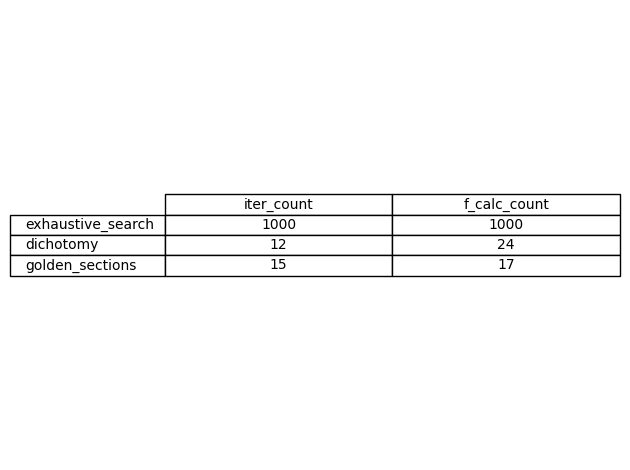

In [11]:
methods_and_points = {}
table_data = []

for m in methods_list:
    optim, iter_count, f_calc_count = m(f_2, a = a_2, b = b_2)
    methods_and_points[m.__name__] = optim
    table_data.append([iter_count, f_calc_count])

plot_func_and_optimal_point(f_2, methods_and_points, a = a_2, b = b_2, func_name = '|x - 0.2|')
make_table(table_data)

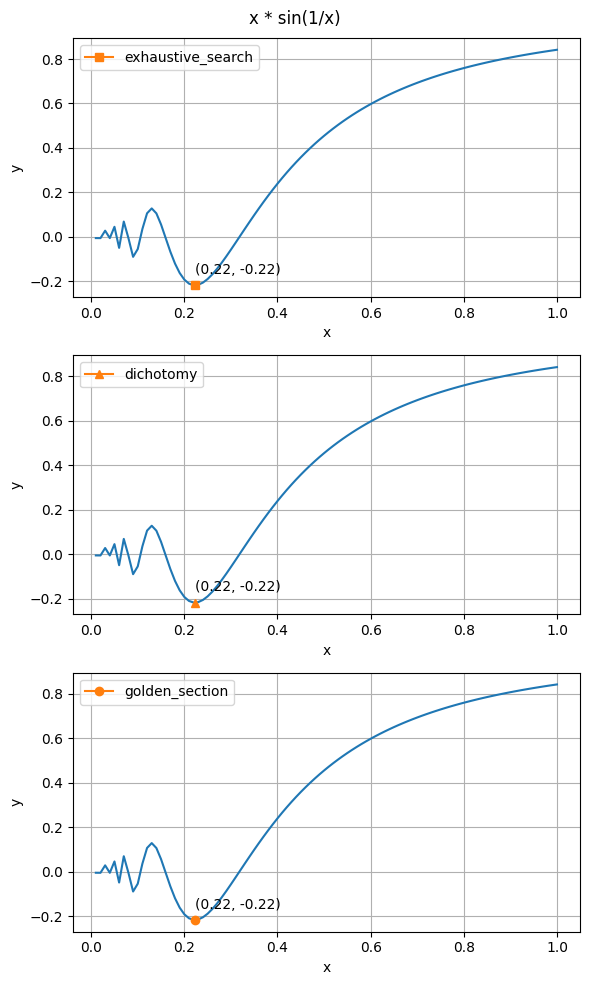

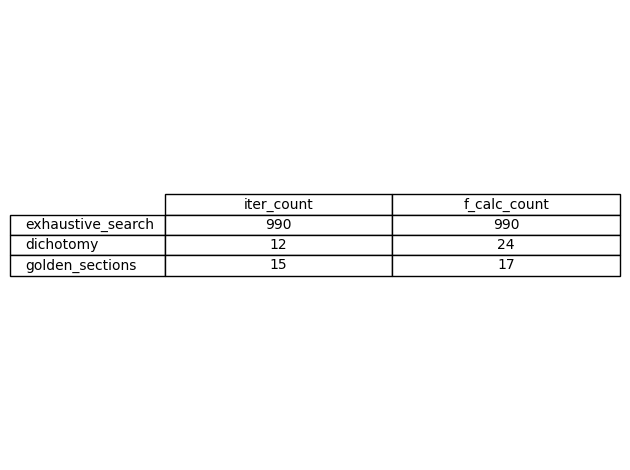

In [12]:
methods_and_points = {}
table_data = []

for m in methods_list:
    optim, iter_count, f_calc_count = m(f_3, a = a_3, b = b_3,)
    methods_and_points[m.__name__] = optim
    table_data.append([iter_count, f_calc_count])

plot_func_and_optimal_point(f_3, methods_and_points, a = a_3, b = b_3, func_name = 'x * sin(1/x)')
make_table(table_data)

# PART ||

## Generate random array

In [304]:
a = random.random()
b = random.random()

print(a, b)

0.45510737451957484 0.9510563399505153


In [305]:
x = np.linspace(0, 101, 101) / 100
sigma = np.random.normal(0, 0.1, 101)

y = a * x + b + sigma

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


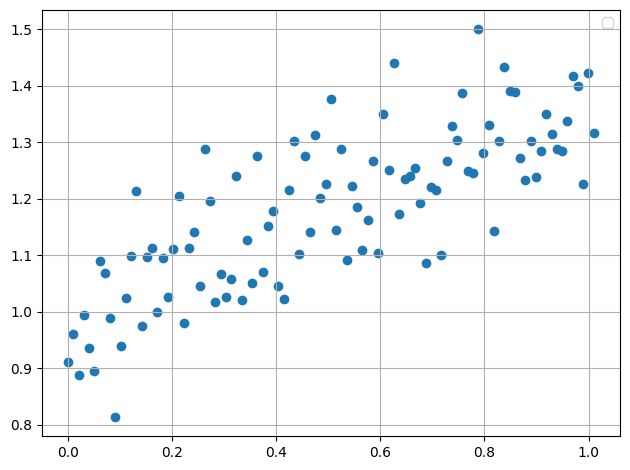

In [306]:
fig, ax = plt.subplots()
ax.scatter(x, y)
ax.grid(True)
ax.legend()
plt.show()

Text(0.5, 0.5, 'Bias')

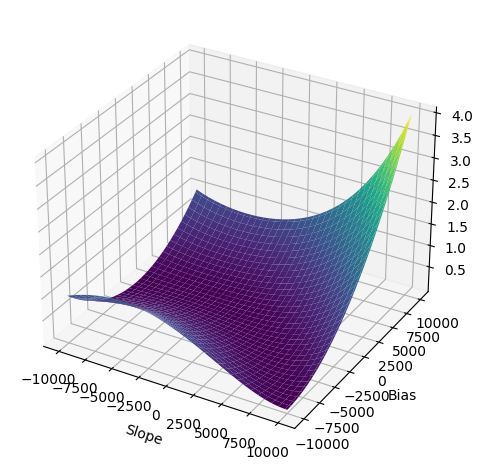

In [307]:

slope = np.linspace(-10000,10000,num=101)  
bias = np.linspace(-10000, 10000,num=101)  
w0, w1 = np.meshgrid(slope, bias)
ypred = w0*x + w1  
loss = np.power((y-ypred),2)  
fig = plt.figure()  
ax = fig.add_subplot(projection='3d')

surf = ax.plot_surface(w0,  
                    w1,  
                    loss,  
                    label="Loss surface",  
                    cmap='viridis', edgecolor='none')  

ax.set_xlabel('Slope')  
ax.set_ylabel('Bias')  


In [308]:
def plot_aprox_result(x, y, methods_and_coafs, aprox_func, aprox_method_name):
    num_of_plots = len(methods_and_coafs) + 1
    fig, ax = plt.subplots(num_of_plots, figsize=(6, 10))
    
    fig.suptitle(aprox_method_name)
    
    for idx, (method) in enumerate(methods_and_coafs) :
        ax[idx].scatter(x, y)
        coef = methods_and_coafs[method]
        
        color = (np.random.random(), np.random.random(), np.random.random())
        ax[idx].plot(x, aprox_func(x, coef[0], coef[1] ), label=method, color=color)
        ax[idx].set(xlabel='x', ylabel='y')
    
        ax[idx].legend()
        ax[idx].grid()
    
    num_of_plots -= 1
    ax[num_of_plots].scatter(x, y)
    ax[num_of_plots].set(xlabel='x', ylabel='y')
    
    for idx, (method) in enumerate(methods_and_coafs):
       
        coef = methods_and_coafs[method]
        print(coef)
        
        color = (np.random.random(), np.random.random(), np.random.random())
        ax[num_of_plots].plot(x, aprox_func(x, coef[0], coef[1] ), label=method, color=color)
    
        ax[num_of_plots].legend()
        ax[num_of_plots].grid()
        
    plt.show()

In [309]:
def make_table_2d(table_data,
               row_headers = ['exhaustive_search_2d','Gauss','Nelder-Mead'],
               column_headers = ['iter_count','f_calc_count', 'precision']):
    
    fig, ax = plt.subplots()
    ax.axis('tight')
    ax.axis('off')
    ax.table(cellText=table_data,
        rowLabels=row_headers,
        colLabels=column_headers,
        loc='center',
        cellLoc='center')

    plt.show()

In [310]:
def linear(x, a, b): 
    return a * x + b

def rational(x, a, b):
    return a / (1 + b * x)

#Spesial version for loss to use in scipy optimisation
def loss_linear(z, *params): 
    x, y = params
    a, b = z
    return np.sum((linear(x, a, b) - y)**2)

#Functional version for loss to calc precision
def f_loss_linear(x, y, a, b): 
    return np.sum((linear(x, a, b) - y)**2)

#Spesial version for loss to use in scipy optimisation
def loss_rational(z, *params): 
    x, y = params
    a, b = z
    return np.sum((rational(x, a, b) - y)**2)

#Functional version for loss to calc precision
def f_loss_rational(x, y, a, b): 
    return np.sum((rational(x, a, b) - y)**2)

# Brute force method linear

In [311]:
brute_force = opt.brute(loss_linear, ([0,1],[0,1]), args=(x,y),  Ns = 1000, full_output=True)

In [312]:
brute_force_coafs = brute_force[0]
grid_size_x, grid_size_y = len(brute_force[2][0]), len(brute_force[2][0])
brute_froce_iter_count =  grid_size_x * grid_size_y
brute_force_f_calc_count = brute_froce_iter_count
brute_force_precision = f_loss_linear(x, y, brute_force_coafs[0], brute_force_coafs[1])

In [313]:
brute_force_result = [brute_froce_iter_count, brute_force_f_calc_count, brute_force_precision]

In [314]:
brute_force_result

[1000000, 1000000, 0.7919185268081413]

# Brute force method rational

In [315]:
brute_force_rational = opt.brute(loss_rational, ([0,1],[0,1]), args=(x,y),  Ns = 1000, full_output=True)

In [316]:
brute_force_coafs_rational = brute_force_rational[0]
grid_size_x, grid_size_y = len(brute_force_rational[2][0]), len(brute_force_rational[2][0])
brute_froce_iter_count_rational =  grid_size_x * grid_size_y
brute_force_f_calc_count_rational = brute_froce_iter_count_rational
brute_force_precision_rational = f_loss_rational(x, y, brute_force_coafs_rational[0], brute_force_coafs_rational[1])

In [317]:
brute_force_result_rational = [brute_froce_iter_count_rational,
                               brute_force_f_calc_count_rational,
                               brute_force_precision_rational]

In [318]:
brute_force_result_rational

[1000000, 1000000, 0.8292232057488668]

In [319]:
brute_force_coafs_rational

array([ 1.01497209, -0.26482321])

# Coordinate descent method

In [320]:
def get_loss_func(fix_coord, loss_type, coefs):
    if loss_type == 'rational':
        func = rational
    if loss_type == 'linear':
        func = linear

    if fix_coord == 'a':
        return lambda a: np.sum((func(x, a, coefs[1]) - y)**2)
    if fix_coord == 'b':
        return lambda b: np.sum((func(x, coefs[0], b) - y)**2)

def coordinate_descent(params, limits, loss_type, e=0.00001):
    dims = len(params)
    coefs = np.random.randn(dims) * 100
    min_loss_value = Point(float('inf'), float('inf'))
    iter_sum = 0
    func_calc_sum = 0
    
    while True:
        L = get_loss_func('a', loss_type, coefs)
        optim_point, iter_count, f_calc_count = exhaustive_search(L, *limits[0])
        coefs[0] = optim_point.x
        
        iter_sum += iter_count  
        func_calc_sum += f_calc_count
        
        L = get_loss_func('b', loss_type, coefs)
        optim_point, iter_count, f_calc_count = exhaustive_search(L, *limits[1])
        coefs[1] = optim_point.x
        
        iter_sum += iter_count  
        func_calc_sum += f_calc_count

        if abs(min_loss_value.x - optim_point.x) <= e and abs(min_loss_value.y - optim_point.y) <= e:
            break
        else:
            print(optim_point.x, optim_point.y)
            min_loss_value = optim_point

    return coefs, iter_sum, func_calc_sum


## Coordinate descent linear 

In [321]:
coord_descent_coefs,\
coord_descent_iter_sum,\
coord_descent_func_calc_sum = coordinate_descent((x, y), ((-1,1),(-1,1)),loss_type='linear')
coord_descent_precision = f_loss_linear(x, y, coord_descent_coefs[0], coord_descent_coefs[1])

coordinate_descent_result = [coord_descent_iter_sum, coord_descent_func_calc_sum, coord_descent_precision]

0.677 4.180538611913722
0.756 2.677733794358924
0.815 1.8466791371458429
0.859 1.3841330698932524
0.8920000000000001 1.1250701314078246
0.917 0.9786991526720595
0.9359999999999999 0.8960559978942914
0.95 0.8494384316566312
0.96 0.8235061829032464
0.968 0.8096847931636398
0.974 0.802087381234699
0.978 0.7974107319653112
0.9810000000000001 0.7950950866318128
0.984 0.7936576567763703
0.986 0.7928126799007045
0.9870000000000001 0.7923559740008155
0.988 0.7921447375669827
0.9890000000000001 0.7920708195972064
0.9890000000000001 0.7920035818011498


## Coordinate descent rational 

In [332]:
coord_descent_coefs_rational,\
coord_descent_iter_sum_rational,\
coord_descent_func_calc_sum_rational = coordinate_descent((x, y), ((-1,1),(-1,1)), loss_type='rational')
coord_descent_precision_rational = f_loss_rational(x, y, coord_descent_coefs[0], coord_descent_coefs[1])

coordinate_descent_result_rational = [coord_descent_iter_sum, coord_descent_func_calc_sum, coord_descent_precision]

0.9990000000000001 145.0442390576777
-0.28200000000000003 0.8384596704443535


In [333]:
coord_descent_coefs_rational

array([ 0.999, -0.282])

# Nelder-Mead linear

In [324]:
initial_guess = [0, 0]
nelder_mead = opt.minimize(loss_linear, initial_guess, args=(x,y), method='Nelder-Mead', tol = 0.001)

In [325]:
nelder_mead

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.7919220917391278
             x: [ 3.774e-01  9.907e-01]
           nit: 56
          nfev: 107
 final_simplex: (array([[ 3.774e-01,  9.907e-01],
                       [ 3.766e-01,  9.906e-01],
                       [ 3.764e-01,  9.913e-01]]), array([ 7.919e-01,  7.919e-01,  7.919e-01]))

In [326]:
nelder_mead_result = [nelder_mead['nit'], nelder_mead['nfev'], nelder_mead['fun']]

# Nelder-Mead rational

In [327]:
initial_guess = [0, 0]
nelder_mead_rational = opt.minimize(loss_rational, initial_guess, args=(x,y), method='Nelder-Mead', tol = 0.001)

In [328]:
nelder_mead_rational

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 0.8292262822764654
             x: [ 1.015e+00 -2.646e-01]
           nit: 60
          nfev: 113
 final_simplex: (array([[ 1.015e+00, -2.646e-01],
                       [ 1.015e+00, -2.648e-01],
                       [ 1.015e+00, -2.655e-01]]), array([ 8.292e-01,  8.292e-01,  8.292e-01]))

In [329]:
nelder_mead_result_rational = [nelder_mead_rational['nit'], nelder_mead_rational['nfev'], nelder_mead_rational['fun']]

[0.37691263 0.99076109]
[0.38  0.989]
[0.37735297 0.99068653]


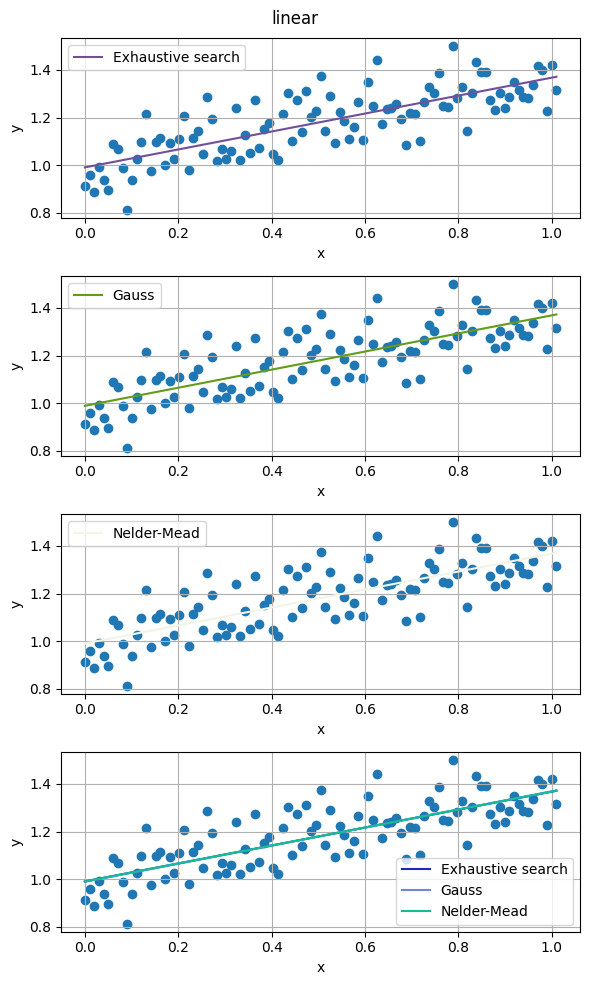

In [330]:
methods_and_coafs = {
    'Exhaustive search': brute_force_coafs,
    'Gauss': coord_descent_coefs,
    'Nelder-Mead': nelder_mead['x'],
}

plot_aprox_result(x, y, methods_and_coafs,linear, 'linear')

[ 1.01497209 -0.26482321]
[ 0.999 -0.282]
[ 1.01522631 -0.26461258]


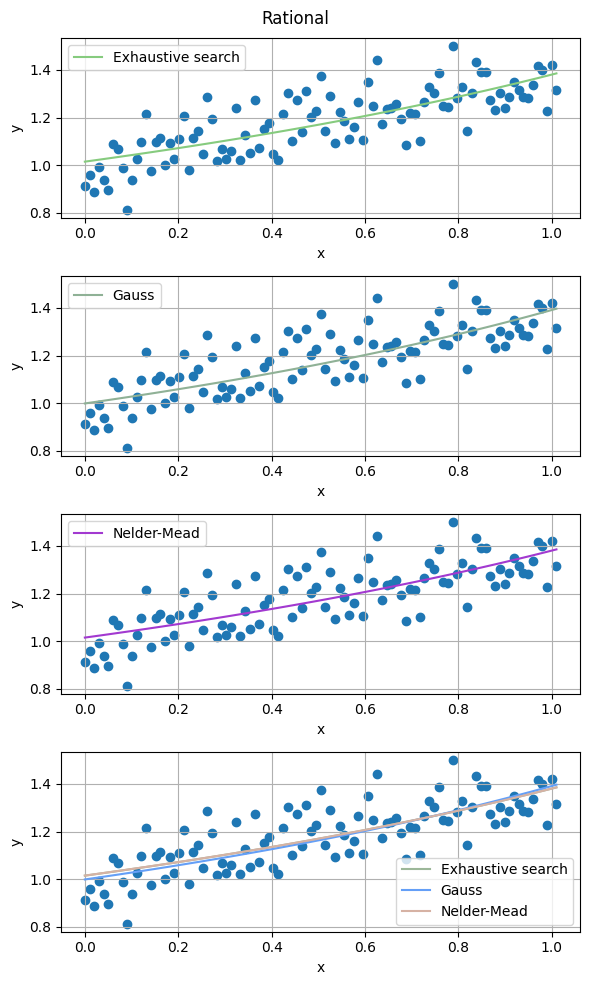

In [334]:
methods_and_coafs = {
    'Exhaustive search': brute_force_coafs_rational,
    'Gauss': coord_descent_coefs_rational,
    'Nelder-Mead': nelder_mead_rational['x'],
}

plot_aprox_result(x, y, methods_and_coafs,rational, 'Rational')

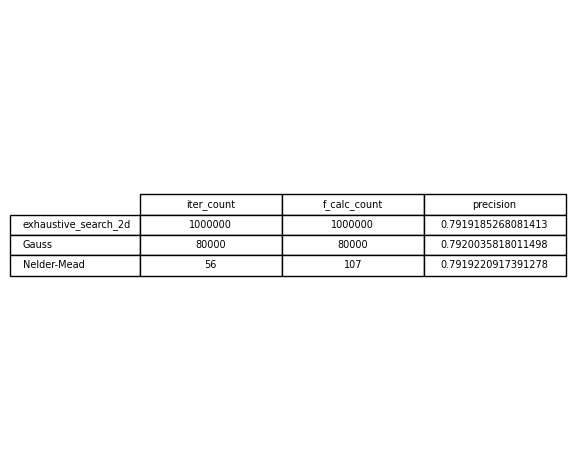

In [335]:
make_table_2d([brute_force_result,coordinate_descent_result,nelder_mead_result])

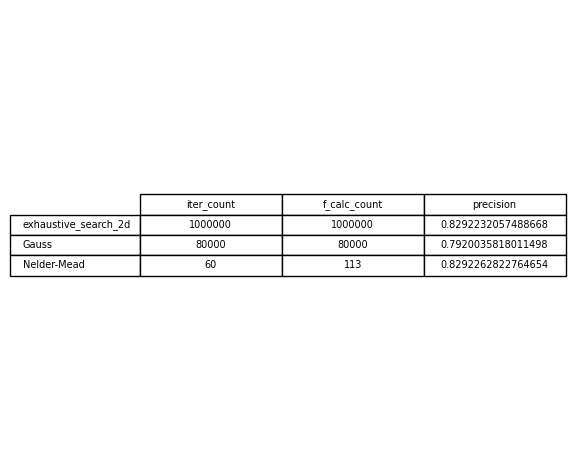

In [336]:
make_table_2d([brute_force_result_rational,coordinate_descent_result_rational,nelder_mead_result_rational])